In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns

# t-SNE

## houses

In [2]:
houses = pd.read_csv('../features_for_quiz/houses/classes.csv')

In [3]:
houses

,class,outcast,climate,empathy,fighting,honor,connections,unyielding
0,Wildling,1,0,1,5,2,1,4
1,Outlaw,1,1,1,5,1,1,3
2,Dothraki,0,2,1,5,2,1,4
3,Night's Watch,0,0,3,4,5,2,4
4,Soldier,0,1,3,4,4,2,4
5,Foreign Noble,0,2,3,2,2,4,2
6,Foreign Peasant,1,2,3,3,1,1,1
7,Noble,0,1,3,3,3,4,2
8,Peasant,1,1,3,2,1,1,1
9,House Bolton,0,1,1,4,1,3,2


In [4]:
X = houses.drop(columns='class')
y = houses['class']

In [5]:
tsne_houses = TSNE(perplexity=3, init='random', n_iter=1_000_000)
X_embedded = pd.DataFrame(tsne_houses.fit_transform(X), columns=tsne_houses.get_feature_names_out())

In [6]:
X_embedded.head()

,tsne0,tsne1
0,35.082726,-72.274925
1,49.621635,-70.426788
2,47.596069,-85.719162
3,-81.056885,64.337837
4,-71.419128,51.175720


In [7]:
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 'x', '*', '2']

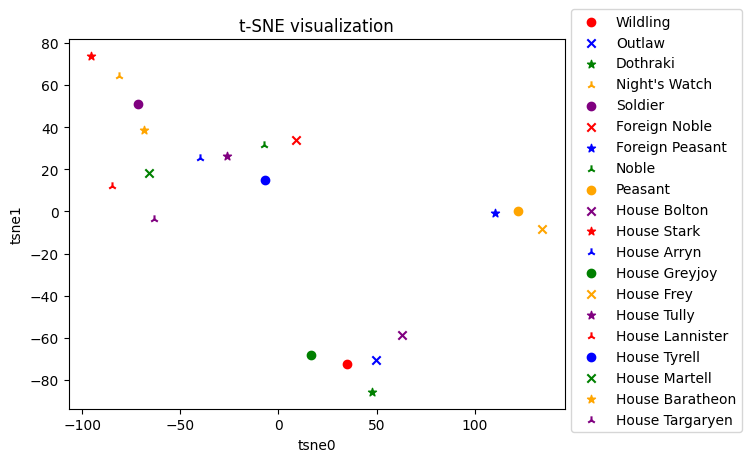

In [8]:
plt.figure()
c = 0
s = 0
for i in range(len(X_embedded)):
    plt.scatter(X_embedded.loc[i][0], X_embedded.loc[i][1], c=colors[c%5], marker=markers[s%4], label=y[i])
    c += 1
    s += 1
plt.legend(bbox_to_anchor=(1, 1.1))
plt.title('t-SNE visualization')
plt.xlabel('tsne0')
plt.ylabel('tsne1')
plt.show()

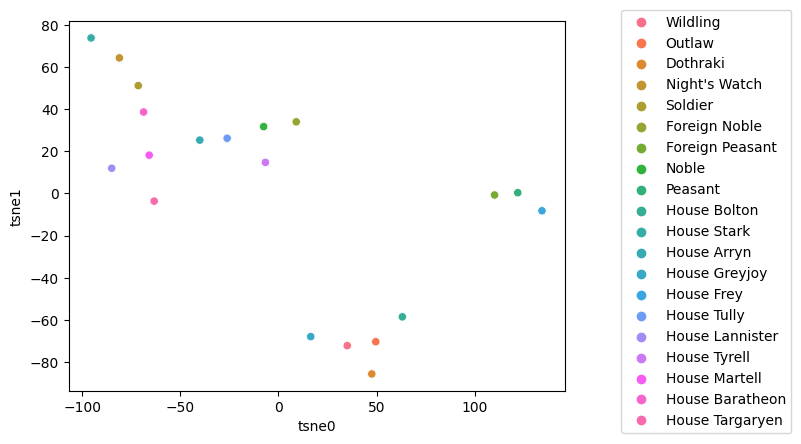

In [9]:
plt.figure()
sns.scatterplot(data = pd.DataFrame(X_embedded), x = 'tsne0', y = 'tsne1', hue=y);
plt.legend(bbox_to_anchor=(1.1, 1.05));

## characters

In [10]:
char = pd.read_csv('../processed_data/cleaned_data_final.csv')
char.drop(columns=['name', 'season', 'episode', 'deaths', 'episode_num'], inplace=True)

In [11]:
char

,male,origin,isMarried,isNoble,popularity,isAlive
0,1,House Targaryen,0,0,0.605351,0
1,1,House Frey,1,1,0.896321,0
2,1,House Lannister,0,1,0.267559,1
3,0,House Arryn,1,1,0.183946,0
4,0,House Martell,1,1,0.043478,1
...,...,...,...,...,...,...
1944,1,House Stark,0,0,0.351171,0
1945,1,House Bolton,0,0,0.096990,0
1946,1,Dothraki,0,0,0.030100,1
1947,1,Peasant,0,0,0.130435,1


In [12]:
X = char.drop(columns='isAlive')
y = char['isAlive']

In [13]:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('cat_transformer', cat_transformer, ['origin'])],
    remainder='passthrough'
)

In [14]:
X_proc = pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out())

In [15]:
X_proc

,cat_transformer__origin_Dothraki,cat_transformer__origin_Foreign Noble,cat_transformer__origin_Foreign Peasant,cat_transformer__origin_House Arryn,cat_transformer__origin_House Baratheon,cat_transformer__origin_House Bolton,cat_transformer__origin_House Frey,cat_transformer__origin_House Greyjoy,cat_transformer__origin_House Lannister,cat_transformer__origin_House Martell,...,cat_transformer__origin_Night's Watch,cat_transformer__origin_Noble,cat_transformer__origin_Outlaw,cat_transformer__origin_Peasant,cat_transformer__origin_Soldier,cat_transformer__origin_Wildling,remainder__male,remainder__isMarried,remainder__isNoble,remainder__popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.605351
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.896321
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.267559
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.183946
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.351171
1945,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.096990
1946,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.030100
1947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.130435


In [25]:
tsne_char = TSNE(n_components=3, perplexity=3)
X_embedded = pd.DataFrame(tsne_char.fit_transform(X_proc), columns=tsne_char.get_feature_names_out())

In [26]:
X_embedded

,tsne0,tsne1,tsne2
0,6.223185,-15.997188,8.269595
1,14.801088,-1.597249,37.355625
2,11.798794,1.920247,6.308996
3,15.236878,26.199759,-0.900900
4,12.551488,18.133869,-2.627115
...,...,...,...
1944,-2.310677,-17.843958,13.686364
1945,-6.669931,0.428999,1.457087
1946,-5.789146,-26.567347,12.851110
1947,-3.982372,-11.208860,8.555261


<IPython.core.display.Javascript object>


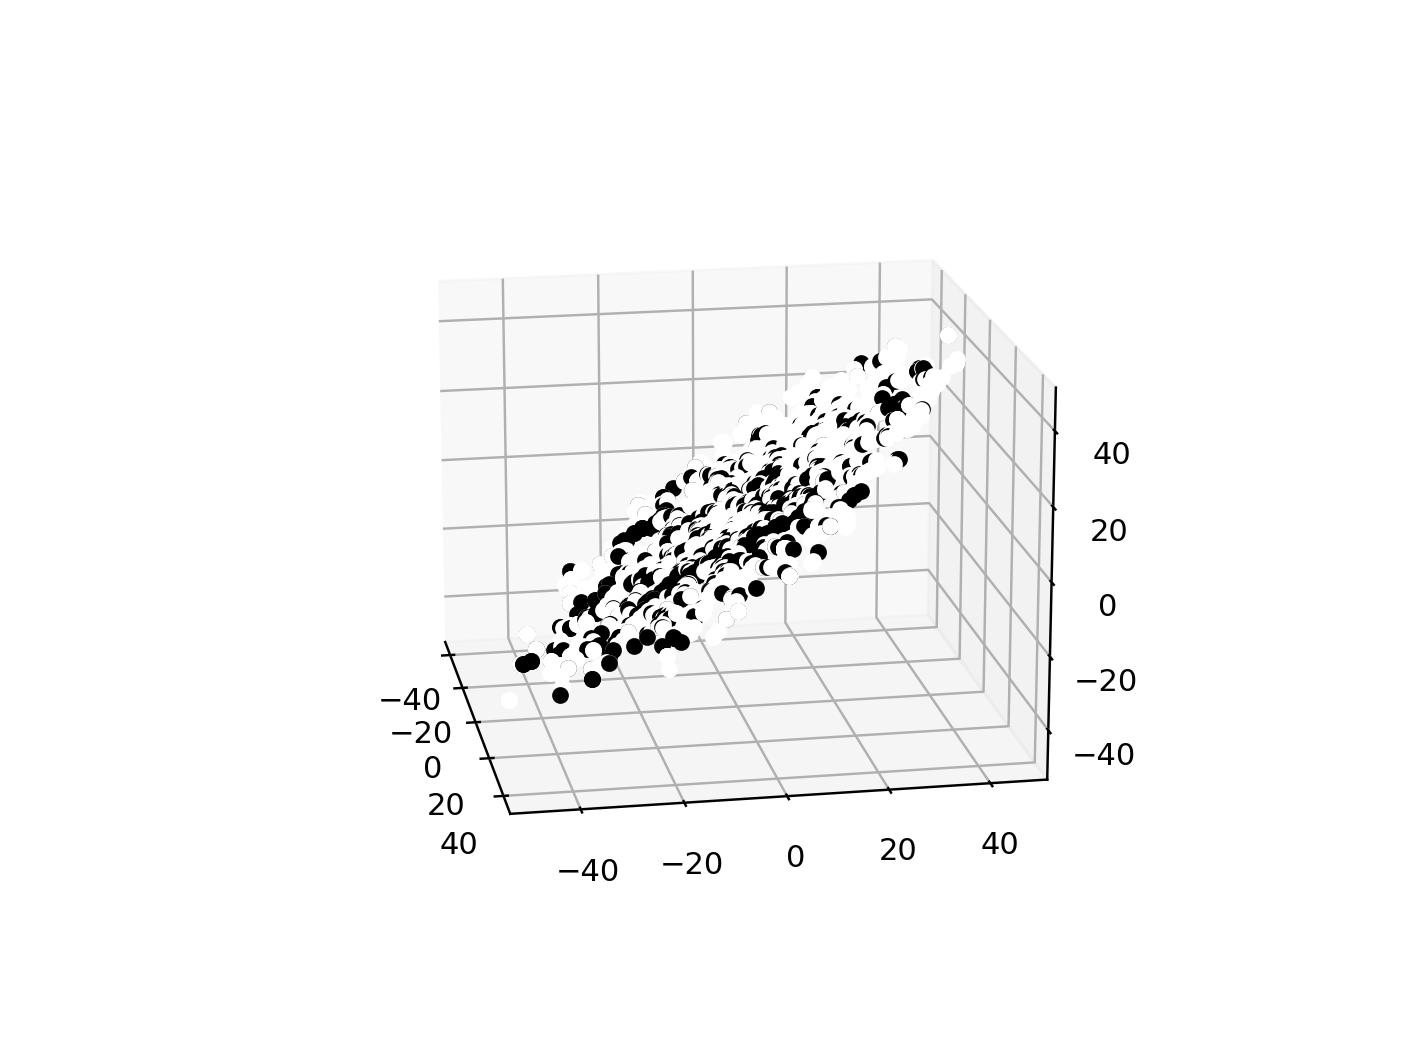

In [39]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(len(X_embedded)):
    ax.scatter(X_embedded.loc[i][0], X_embedded.loc[i][1], X_embedded.loc[i][1], color=f'{y[i]}')
    
# plt.legend(bbox_to_anchor=(1, 1.1))
# plt.title('t-SNE visualization')
# plt.xlabel('tsne0')
# plt.ylabel('tsne1')
plt.show()

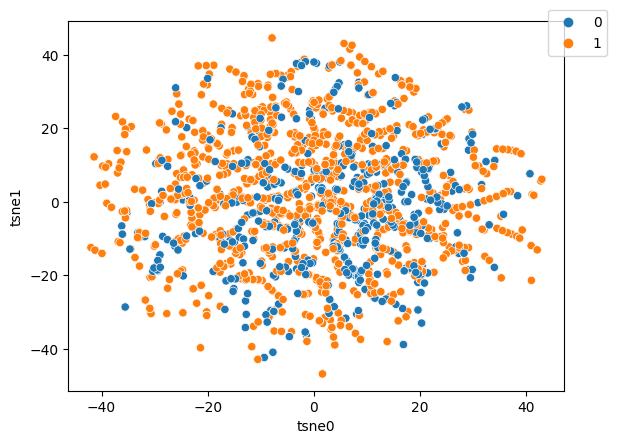

In [27]:
plt.figure()
sns.scatterplot(data = pd.DataFrame(X_embedded), x = 'tsne0', y = 'tsne1', hue=y);
plt.legend(bbox_to_anchor=(1.1, 1.05));

In [28]:
# plt.figure()
# c = 0
# s = 0
# for i in range(len(X_embedded)):
#     plt.scatter(X_embedded.loc[i][0], X_embedded.loc[i][1], c=colors[c%5], marker=markers[s%4], label=y[i])
#     c += 1
#     s += 1
# plt.legend(bbox_to_anchor=(1, 1.1))
# plt.title('t-SNE visualization')
# plt.xlabel('tsne0')
# plt.ylabel('tsne1')
# plt.show()